In [1]:
import torch

import pandas as pd

from utilities.dataloaders import news_loader
from utilities.functions import train_model, plot_loss
from utilities.models import news_classifier

In [2]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

EPOCH = 100
BATCH_SIZE = 64
NUM_CLASSES = 15
LR = 1e-5

In [3]:
# load the data
news_df = pd.read_csv('data/stories_clean.csv')

vocab, train_loder, val_loader = news_loader(news_df, batch_size=BATCH_SIZE)

# create model
model = news_classifier(lstm_layers=2,
                        hidden_dim=256,
                        embedding_dim=64,
                        device = DEVICE,
                        vocab_size=len(vocab), 
                        num_classes=NUM_CLASSES, 
                        batch_size = BATCH_SIZE)

In [4]:
results = train_model([model, 'news_classifier'], train_loder, val_loader, DEVICE, lr=LR, epoch=10)

TRAINING [001/010]


100%|██████████| 73/73 [00:06<00:00, 11.25it/s]


	[ Train | 001/010 ] Loss = 0.75801
	learning rate 0.000010
VALIDATION [001/010]


100%|██████████| 9/9 [00:00<00:00, 19.28it/s]


	[ Valid | 001/010 ] Loss = 0.69288 -> New best performance!
		Saving this model in './trained_models/news_classifier/best_model.pth'
TRAINING [002/010]


100%|██████████| 73/73 [00:07<00:00,  9.99it/s]


	[ Train | 002/010 ] Loss = 0.75775
	learning rate 0.000009
VALIDATION [002/010]


100%|██████████| 9/9 [00:00<00:00, 21.29it/s]


	[ Valid | 002/010 ] Loss = 0.69647
TRAINING [003/010]


100%|██████████| 73/73 [00:07<00:00,  9.94it/s]


	[ Train | 003/010 ] Loss = 0.75755
	learning rate 0.000008
VALIDATION [003/010]


100%|██████████| 9/9 [00:00<00:00, 14.47it/s]


	[ Valid | 003/010 ] Loss = 0.69491
TRAINING [004/010]


100%|██████████| 73/73 [00:09<00:00,  7.77it/s]


	[ Train | 004/010 ] Loss = 0.75737
	learning rate 0.000007
VALIDATION [004/010]


100%|██████████| 9/9 [00:00<00:00, 14.49it/s]


	[ Valid | 004/010 ] Loss = 0.69619
TRAINING [005/010]


100%|██████████| 73/73 [00:08<00:00,  8.37it/s]


	[ Train | 005/010 ] Loss = 0.75710
	learning rate 0.000005
VALIDATION [005/010]


100%|██████████| 9/9 [00:00<00:00, 11.53it/s]


	[ Valid | 005/010 ] Loss = 0.69712
TRAINING [006/010]


100%|██████████| 73/73 [00:10<00:00,  7.04it/s]


	[ Train | 006/010 ] Loss = 0.75666
	learning rate 0.000003
VALIDATION [006/010]


100%|██████████| 9/9 [00:00<00:00, 15.43it/s]


	[ Valid | 006/010 ] Loss = 0.69740
TRAINING [007/010]


100%|██████████| 73/73 [00:08<00:00,  9.09it/s]


	[ Train | 007/010 ] Loss = 0.75671
	learning rate 0.000002
VALIDATION [007/010]


100%|██████████| 9/9 [00:00<00:00, 16.16it/s]


	[ Valid | 007/010 ] Loss = 0.69676
TRAINING [008/010]


100%|██████████| 73/73 [00:08<00:00,  8.31it/s]


	[ Train | 008/010 ] Loss = 0.75667
	learning rate 0.000001
VALIDATION [008/010]


100%|██████████| 9/9 [00:00<00:00, 10.40it/s]


	[ Valid | 008/010 ] Loss = 0.69572
TRAINING [009/010]


100%|██████████| 73/73 [00:08<00:00,  8.22it/s]


	[ Train | 009/010 ] Loss = 0.75651
	learning rate 0.000000
VALIDATION [009/010]


100%|██████████| 9/9 [00:00<00:00, 10.84it/s]


	[ Valid | 009/010 ] Loss = 0.70003
TRAINING [010/010]


100%|██████████| 73/73 [00:08<00:00,  8.16it/s]


	[ Train | 010/010 ] Loss = 0.75658
	learning rate 0.000000
VALIDATION [010/010]


100%|██████████| 9/9 [00:00<00:00, 10.87it/s]


	[ Valid | 010/010 ] Loss = 0.69906


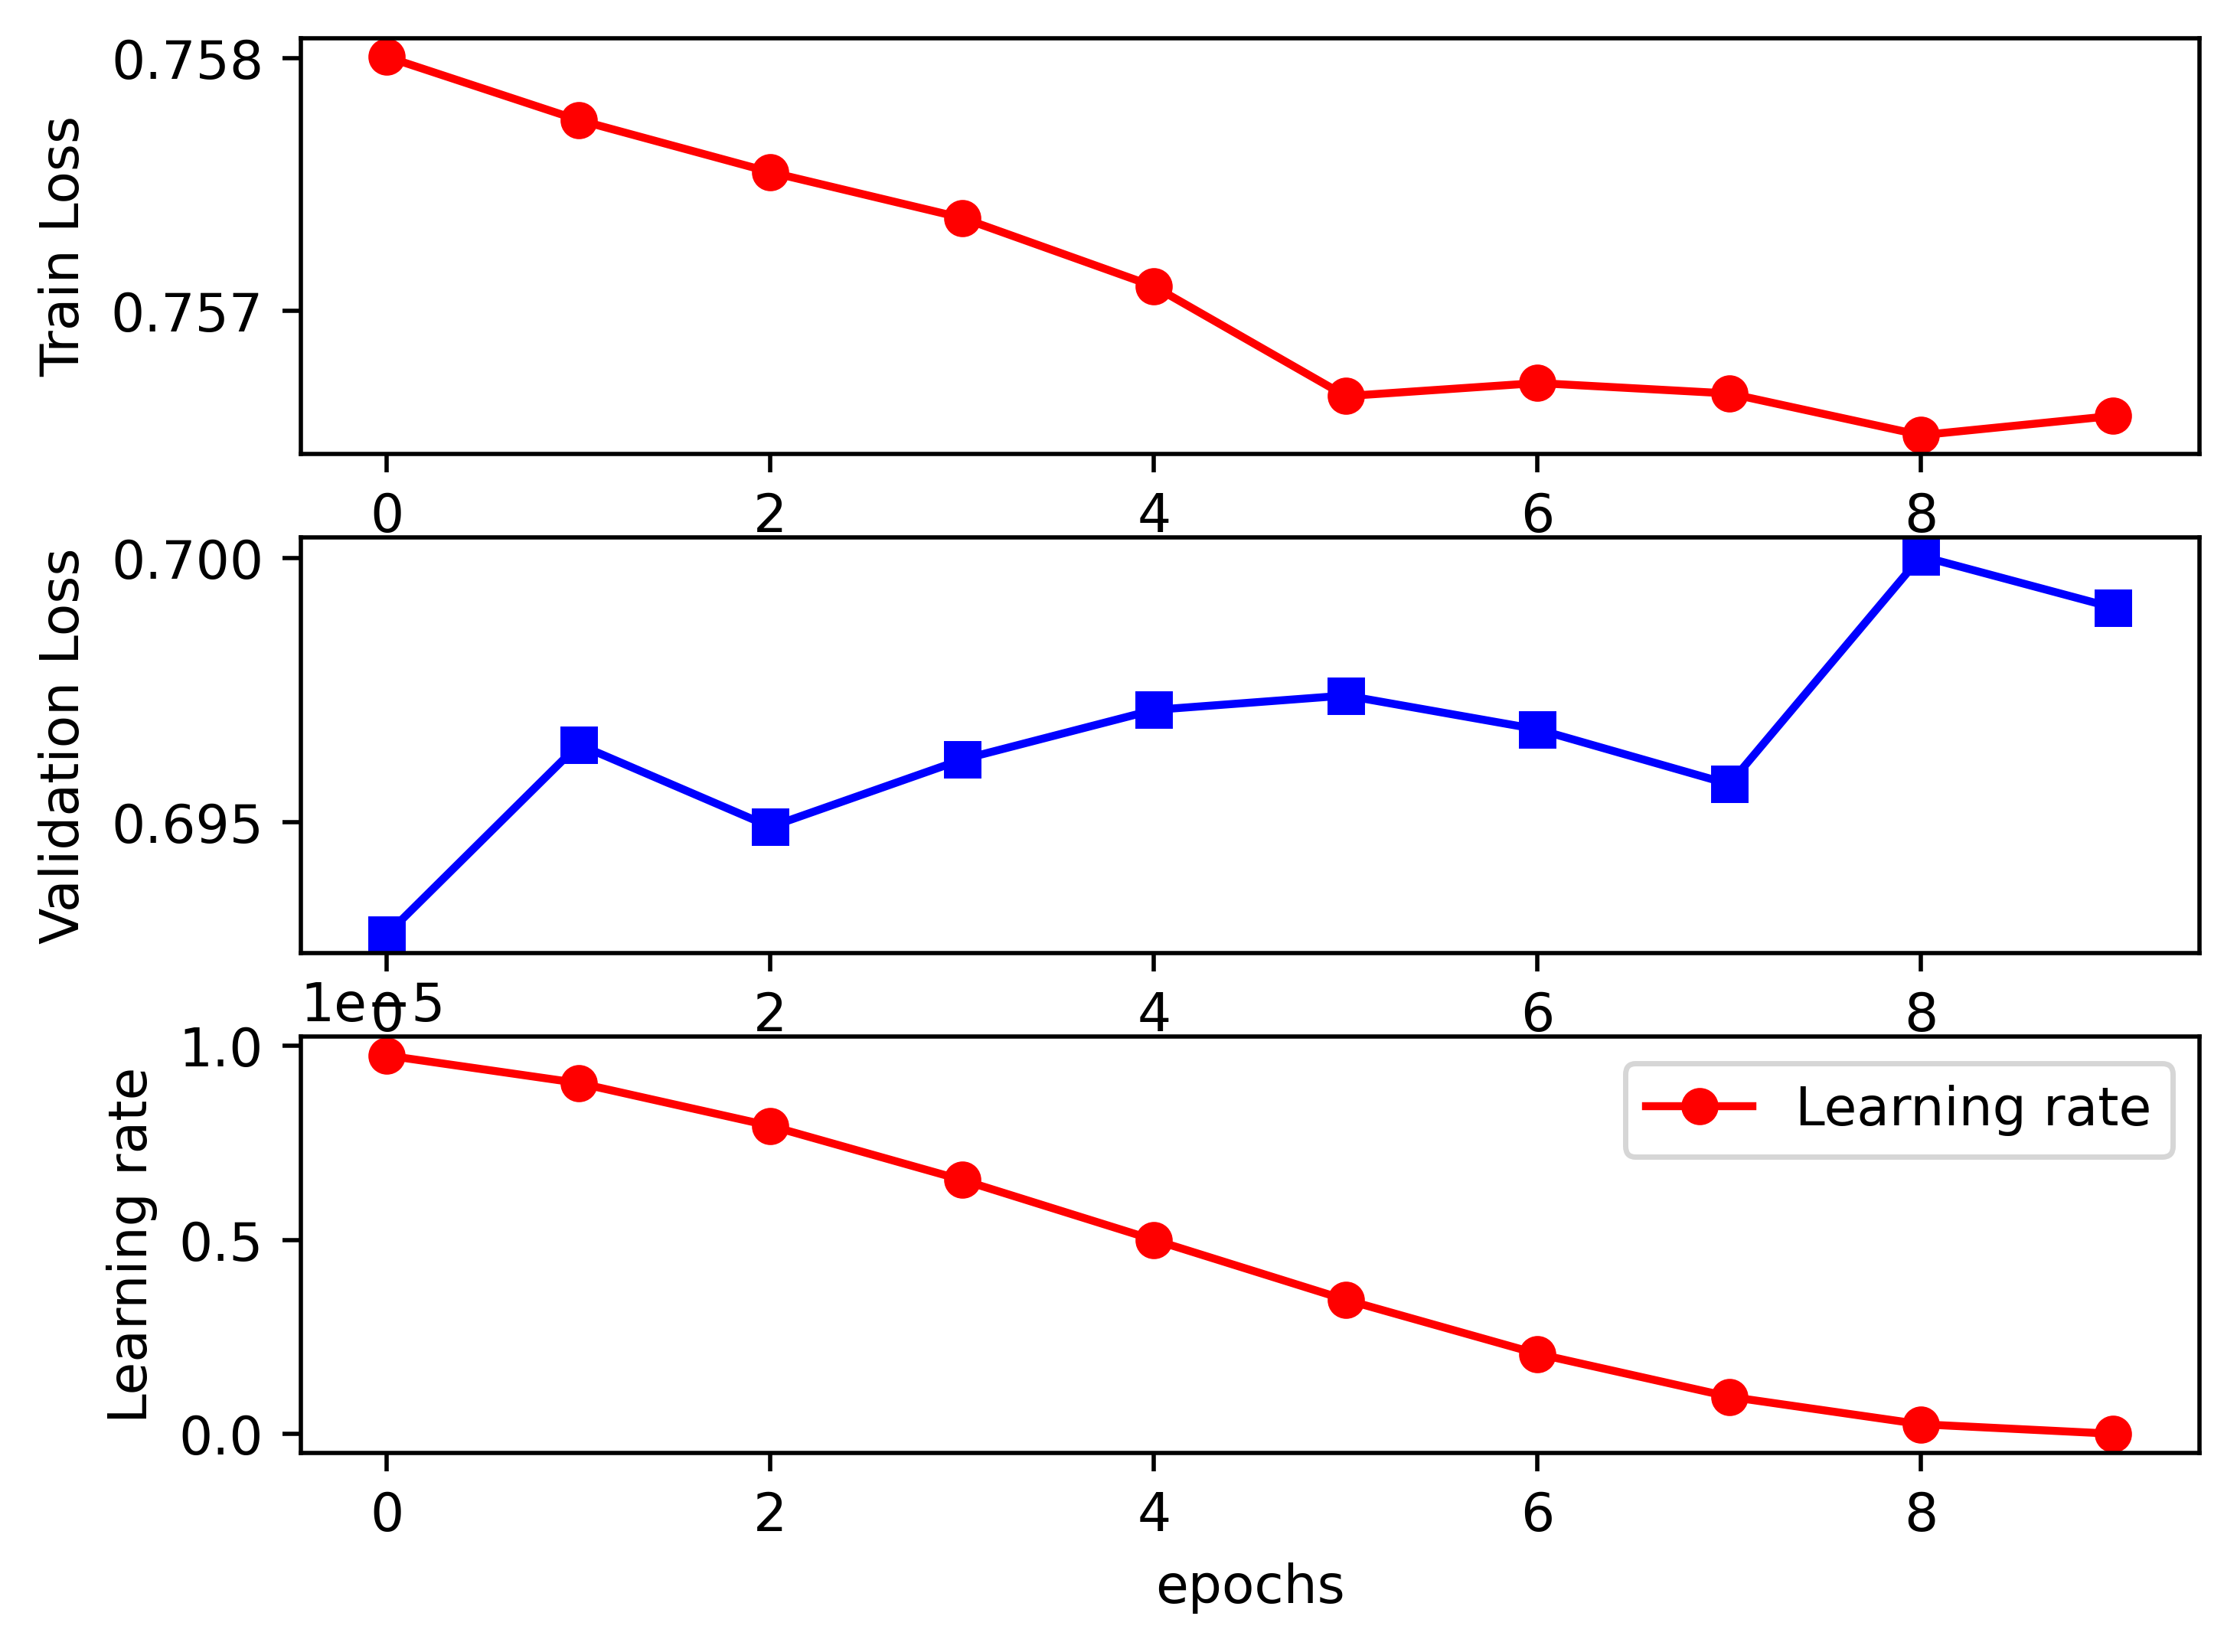

In [5]:
plot_loss(**results)